In [1]:
# Python relies on libraries

# import a library for array manipulations
import numpy as np

# import a library for plotting
%matplotlib inline
import matplotlib.pyplot as plt

# import a library to load files
import scipy.io as sio

# Library to load csv files
import csv

In [2]:
# Load the csv file to python
data = csv.reader(open('AL_eeg.csv','rb'))

In [3]:
print 'The type of data is: ', type(data)

# Skip the header
header = data.next()

# Initialize a variable to keep our data
raw_data = []
for row in data:
    raw_data.append(row)

# Transpose the variable
raw_data = np.asarray(raw_data).T

# In raw data, the stim triggers (codes) are in row 19
stim_triggs = raw_data[19]

# the number of eeg channels
nchan = 14

# select eeg channels
raw_data = raw_data[2:2 + nchan]

print 'the shape of data is: ', raw_data.shape
print 'the shape of stim_triggs is:', stim_triggs.shape

The type of data is:  <type '_csv.reader'>
the shape of data is:  (14L, 115328L)
the shape of stim_triggs is: (115328L,)


In [4]:
# Let's get some general attributes of the data

# eog channels
# the emotiv doesn't have eog channels

# stim channel
stim_chan = 19

# sampling rate
fs = 128

# print how long the EEG recording is:
print 'This EEG recording is', raw_data.shape[1]/fs,'seconds long'

This EEG recording is 901 seconds long


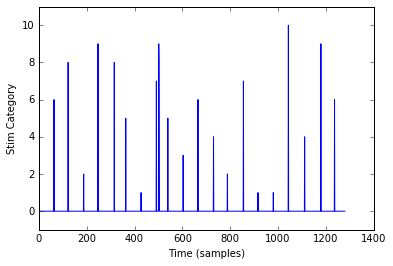

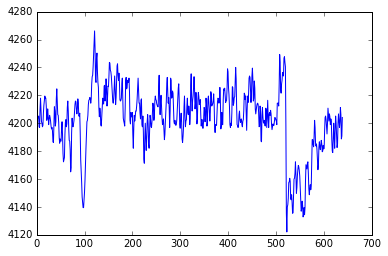

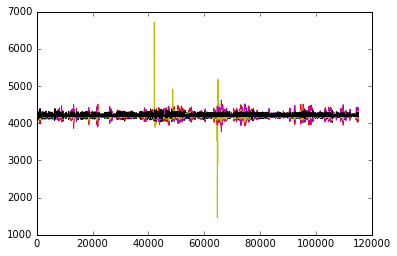

In [5]:
# Let's visualize some of the variables we have:

# Let's see the triggers
plt.plot(stim_triggs[:fs * 10])
plt.ylim([-1, 11])
plt.xlabel('Time (samples)')
plt.ylabel('Stim Category')
plt.show()

# let's see a single channel of eeg for 4 seconds
plt.plot(raw_data[5, 0:fs * 5])
plt.show()

# plot all EEG channels
plt.plot(raw_data[0:14].T)
plt.show()

Lets check the offset of channel 1, which is:  4213.33300781250000000000


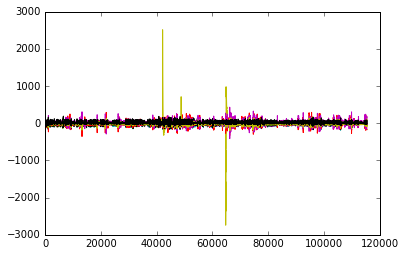

In [6]:
# we will remove the DC bias from all channels

print 'Lets check the offset of channel 1, which is:', raw_data[0, 0]

# The csv file throws a datum with a type of 'string', and here we cast it
# to be a float
raw_data = raw_data.astype(np.float)

# print raw_data.shape, range(14)

# let's create a matrix where we will store the data without an offset:
raw_data_no_offset = np.zeros(raw_data.shape)

# Remove the offset
for channel in range(14):
    raw_data_no_offset[channel, :] = raw_data[channel, :] - raw_data[channel, 0]

# Let's see the data
plt.plot(raw_data_no_offset.T)
plt.show()

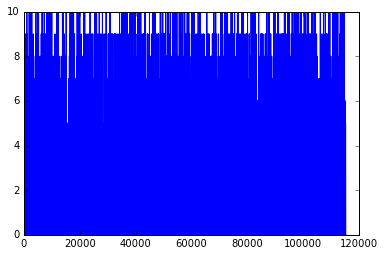

the shape of stim_idx is:  (1L, 1821L)
The first 30 indices where stimuli arrive are:  [  63  122  187  247  315  363  427  491  501  502  503  539  603  665  730
  788  855  916  980 1043 1111 1179 1236 1295 1359 1426 1484 1552 1619 1679]


In [7]:
# let's epoch the data

# first,let's identify where the stimuli are
# as a first approximation, let's plot the stim channel

# let's just plot the first 10 seconds
plt.plot(stim_triggs)
plt.show()
# we need to zoom in to the samples where the entry and exit of stimuli 
# becomes more visually eident

# Change this to be float
stim_triggs = stim_triggs.astype(np.float)

# let's isolate the indices where the triggers come in
stim_idx = np.asarray(np.where(stim_triggs > 0))

print 'the shape of stim_idx is: ', stim_idx.shape
print 'The first 30 indices where stimuli arrive are: ', stim_idx[0, 0:30]

In [8]:
# let's isolate the indices where the standard triggers come in
standard_stim_idx = np.asarray(np.where(np.logical_and(stim_triggs > 0, stim_triggs < 9)))

print 'the shape of stim_idx is: ', standard_stim_idx.shape
print 'first 30 indices stimuli arrive are: ', standard_stim_idx[0, 0:30]

# let's isolate the indices where the deviant triggers come in
deviant_stim_idx = np.asarray(np.where(stim_triggs > 8))

print 'the shape of stim_idx is: ', deviant_stim_idx.shape
print 'first 30 indices stimuli arrive are: ', deviant_stim_idx[0, 0:30]

the shape of stim_idx is:  (1L, 1427L)
first 30 indices stimuli arrive are:  [  63  122  187  315  363  427  491  502  503  539  603  665  730  788  855
  916  980 1111 1236 1295 1359 1426 1484 1552 1619 1679 1743 1802 1931 2126]
the shape of stim_idx is:  (1L, 394L)
first 30 indices stimuli arrive are:  [ 247  501 1043 1179 1870 1995 2057 2311 2635 2752 2817 3391 4215 4343 4786
 4915 5235 6181 6499 6562 6876 7267 7767 7896 8146 8213 8277 8463 8718 8779]


In [9]:
# we know that the data has shape raw_data_no_offset.shape

# the first thing we should do, is to count how many stim we have!
stim_count = stim_idx.shape[1]

print 'The shape of stim_idx is: ', type(stim_idx)
print 'The indices for the first 10 stim are: ', stim_idx[0:10]
print stim_count

The shape of stim_idx is:  <type 'numpy.ndarray'>
The indices for the first 10 stim are:  [[    63    122    187 ..., 115164 115219 115280]]
1821


In [10]:
# count how many standard stim we have!
standard_stim_count = standard_stim_idx.shape[1]

print 'The shape of standard_stim_idx is: ', type(standard_stim_idx)
print 'The indices for the first 10 standard stim are: ', standard_stim_idx[0:10]
print standard_stim_count

# count how many deviant stim we have!
deviant_stim_count = deviant_stim_idx.shape[1]

print 'The shape of deviant_stim_count is: ', type(deviant_stim_idx)
print 'The indices for the first 10 deviant stim are: ', deviant_stim_idx[0:10]
print deviant_stim_count

The shape of standard_stim_idx is:  <type 'numpy.ndarray'>
The indices for the first 10 standard stim are:  [[    63    122    187 ..., 115164 115219 115280]]
1427
The shape of deviant_stim_count is:  <type 'numpy.ndarray'>
The indices for the first 10 deviant stim are:  [[   247    501   1043   1179   1870   1995   2057   2311   2635   2752
    2817   3391   4215   4343   4786   4915   5235   6181   6499   6562
    6876   7267   7767   7896   8146   8213   8277   8463   8718   8779
    8978   9168   9226   9607   9738   9985  11130  11824  12334  13795
   13925  14111  14174  14495  15124  16396  16523  17158  17414  17725
   17791  17918  18107  19059  19377  19567  19629  20011  20519  21339
   21655  21787  22165  22675  23179  23693  24255  24447  24701  25400
   25650  26034  26159  26479  26983  27427  27871  28125  28698  29074
   29453  30211  30283  30849  31105  31485  31546  31799  32371  32430
   32618  32815  33065  33643  34081  34274  34460  34782  34970  35351
   35545

In [11]:
# now we will finally epoch the data

# we pick these parameters based on what we want to see in the data
pre_stim = 10
post_stim = 50

epoched_data = np.zeros([nchan, stim_count, pre_stim + post_stim])

for stim_num in range(stim_count - 1):
    stim = stim_idx[0, stim_num]
    epoched_data[:, stim_num, :] = \
        raw_data_no_offset[0:nchan, (stim - pre_stim):(stim + post_stim)]

In [12]:
standard_epoched_data = np.zeros([nchan, standard_stim_count, pre_stim + post_stim])

for stim_num in range(standard_stim_count - 1):
    stim = standard_stim_idx[0, stim_num]
    standard_epoched_data[:, stim_num, :] = \
        raw_data_no_offset[0:nchan, (stim - pre_stim):(stim + post_stim)]
        
deviant_epoched_data = np.zeros([nchan, deviant_stim_count, pre_stim + post_stim])

for stim_num in range(deviant_stim_count - 1):
    stim = deviant_stim_idx[0, stim_num]
    deviant_epoched_data[:, stim_num, :] = \
        raw_data_no_offset[0:nchan, (stim - pre_stim):(stim + post_stim)]

C:\Users\BOA\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 14 + 1) instead
  app.launch_new_instance()
C:\Users\BOA\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 1820 + 1) instead


Plotting data for channel  3  and epoch number  1666
Dimensions before squeezing: (60L,)
Dimensions after squeezing: (60L,)


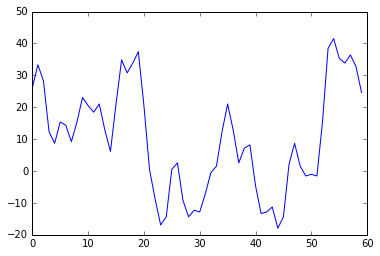

In [13]:
# sanity check, let's plot some datapoints

rand_chan = np.random.random_integers(nchan)
rand_epoch = np.random.random_integers(stim_count - 1)

print 'Plotting data for channel ', rand_chan, ' and epoch number ', rand_epoch 

print 'Dimensions before squeezing:', epoched_data[rand_chan, rand_epoch, :].shape
print 'Dimensions after squeezing:', np.squeeze(epoched_data[rand_chan, rand_epoch, :]).shape

plt.plot(epoched_data[rand_chan, rand_epoch, :])
plt.show()

Plotting data for channel  3  and epoch number  198
Dimensions before squeezing: (60L,)
Dimensions after squeezing: (60L,)


C:\Users\BOA\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 1426 + 1) instead
  if __name__ == '__main__':


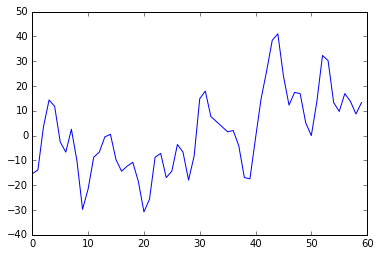

C:\Users\BOA\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 393 + 1) instead


Plotting data for channel  3  and epoch number  166
Dimensions before squeezing: (60L,)
Dimensions after squeezing: (60L,)


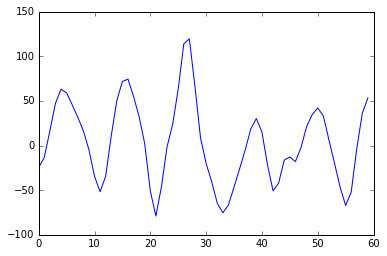

In [14]:
standard_rand_epoch = np.random.random_integers(standard_stim_count - 1)

print 'Plotting data for channel ', rand_chan, ' and epoch number ', standard_rand_epoch 

print 'Dimensions before squeezing:', standard_epoched_data[rand_chan, standard_rand_epoch, :].shape
print 'Dimensions after squeezing:', np.squeeze(standard_epoched_data[rand_chan, standard_rand_epoch, :]).shape

plt.plot(standard_epoched_data[rand_chan, standard_rand_epoch, :])
plt.show()


deviant_rand_epoch = np.random.random_integers(deviant_stim_count - 1)

print 'Plotting data for channel ', rand_chan, ' and epoch number ', deviant_rand_epoch 

print 'Dimensions before squeezing:', deviant_epoched_data[rand_chan, deviant_rand_epoch, :].shape
print 'Dimensions after squeezing:', np.squeeze(deviant_epoched_data[rand_chan, deviant_rand_epoch, :]).shape

plt.plot(deviant_epoched_data[rand_chan, deviant_rand_epoch, :])
plt.show()

In [15]:
# The next step, is to rmove the DC offset from each one of our epochs

# we have a stimulus, arriving at 200 ms into our epoch.
# All epochs have a DC offset associated with it
# we want DC to be 0 at the time that the stim came in.
# Therefore, grab a window of 20 ms before the
# actual onset of the stimulus, average the values in
# this window, and remove that DC component from the 
# entire epoch.

stim_arrival = 10

baseline_period = range(5, 10)

epoched_data_basel_corr = np.zeros(epoched_data.shape)

for chan in range(nchan):
    for epoch in range(epoched_data.shape[1]):
        epoched_data_basel_corr[chan, epoch, :] = \
            epoched_data[chan, epoch, :] - \
            np.mean(epoched_data[chan, epoch, baseline_period])

In [16]:
standard_epoched_data_basel_corr = np.zeros(standard_epoched_data.shape)

for chan in range(nchan):
    for epoch in range(standard_epoched_data.shape[1]):
        standard_epoched_data_basel_corr[chan, epoch, :] = \
            standard_epoched_data[chan, epoch, :] - \
            np.mean(standard_epoched_data[chan, epoch, baseline_period])
            
deviant_epoched_data_basel_corr = np.zeros(deviant_epoched_data.shape)

for chan in range(nchan):
    for epoch in range(deviant_epoched_data.shape[1]):
        deviant_epoched_data_basel_corr[chan, epoch, :] = \
            deviant_epoched_data[chan, epoch, :] - \
            np.mean(deviant_epoched_data[chan, epoch, baseline_period])

C:\Users\BOA\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 14 + 1) instead
  app.launch_new_instance()
C:\Users\BOA\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 1821 + 1) instead


Plotting data for channel  5  and epoch number  688


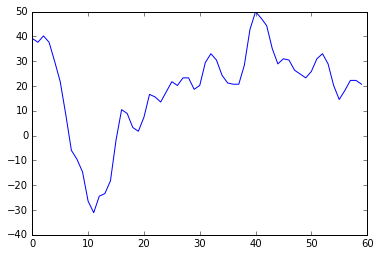

In [17]:
# sanity check, let's plot some datapoints

rand_chan = np.random.random_integers(nchan)
rand_epoch = np.random.random_integers(stim_count)

print 'Plotting data for channel ', rand_chan, \
    ' and epoch number ', rand_epoch 
plt.plot(epoched_data_basel_corr[rand_chan, rand_epoch, :])
plt.show()

Plotting data for channel  5  and epoch number  1260


C:\Users\BOA\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 1427 + 1) instead
  if __name__ == '__main__':


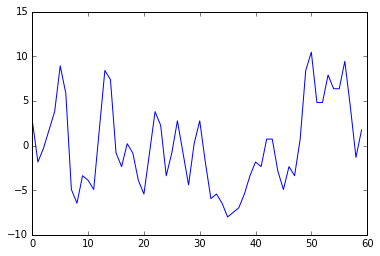

C:\Users\BOA\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: This function is deprecated. Please call randint(1, 394 + 1) instead


Plotting data for channel  5  and epoch number  390


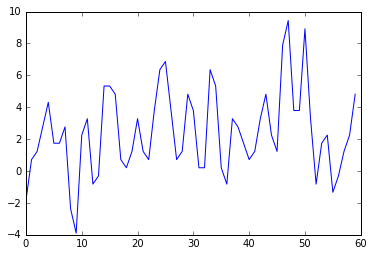

In [18]:
standard_rand_epoch = np.random.random_integers(standard_stim_count)

print 'Plotting data for channel ', rand_chan, \
    ' and epoch number ', standard_rand_epoch 
plt.plot(standard_epoched_data_basel_corr[rand_chan, standard_rand_epoch, :])
plt.show()

deviant_rand_epoch = np.random.random_integers(deviant_stim_count)

print 'Plotting data for channel ', rand_chan, \
    ' and epoch number ', deviant_rand_epoch 
plt.plot(deviant_epoched_data_basel_corr[rand_chan, deviant_rand_epoch, :])
plt.show()

In [19]:
# Now we will eliminate noisy stimuli trials, 
# by cancelling trials with absolute amplitudes greater than 100

amp_limit = 100

bad_epoch_idx = [] 

# print epoched_data_basel_corr[1:10,epoch,1:10]

# we will iterate over all the epochs, which are one 
# of the dimensions in our matrix
# and we will look at all the samples and all the channels simultaneously
for epoch in range(epoched_data_basel_corr.shape[1]):
    if np.max(np.abs(epoched_data_basel_corr[:, epoch, :])) > amp_limit:
        bad_epoch_idx.append(epoch)
                    
clean_epoched_data = epoched_data_basel_corr
            
clean_epoched_data = np.delete(clean_epoched_data, np.asarray(bad_epoch_idx), 1)

print 'The shape of epoched_data_basel_corr is:', epoched_data_basel_corr.shape 
print 'The shape of clean_epoched_data is:', clean_epoched_data.shape 


The shape of epoched_data_basel_corr is: (14L, 1821L, 60L)
The shape of clean_epoched_data is: (14L, 1413L, 60L)


In [46]:
bad_standard_epoch_idx = [] 

# we will iterate over all the epochs, which are one 
# of the dimensions in our matrix
# and we will look at all the samples and all the channels simultaneously
for epoch in range(standard_epoched_data_basel_corr.shape[1]):
    if np.max(np.abs(standard_epoched_data_basel_corr[:, epoch, :])) > amp_limit:
        bad_standard_epoch_idx.append(epoch)
                              
clean_standard_epoched_data = standard_epoched_data_basel_corr
            
clean_standard_epoched_data = np.delete(clean_standard_epoched_data, \
                                        np.asarray(bad_standard_epoch_idx), 1)

print 'The shape of standard_epoched_data_basel_corr is:', \
    standard_epoched_data_basel_corr.shape 
print 'The shape of clean_standard_epoched_data is:', \
    clean_standard_epoched_data.shape
    
###############
    
bad_deviant_epoch_idx = [] 

# we will iterate over all the epochs, which are one 
# of the dimensions in our matrix
# and we will look at all the samples and all the channels simultaneously
for epoch in range(deviant_epoched_data_basel_corr.shape[1]):
    if np.max(np.abs(deviant_epoched_data_basel_corr[:, epoch, :])) > amp_limit:
        bad_deviant_epoch_idx.append(epoch)
                    
clean_deviant_epoched_data = deviant_epoched_data_basel_corr
            
clean_deviant_epoched_data = np.delete(clean_deviant_epoched_data, \
                                        np.asarray(bad_deviant_epoch_idx), 1)

print 'The shape of deviant_epoched_data_basel_corr is:', \
    deviant_epoched_data_basel_corr.shape 
print 'The shape of clean_deviant_epoched_data is:', \
    clean_deviant_epoched_data.shape 



322
The shape of standard_epoched_data_basel_corr is: (14L, 1427L, 60L)
The shape of clean_standard_epoched_data is: (14L, 1105L, 60L)
The shape of deviant_epoched_data_basel_corr is: (14L, 394L, 60L)
The shape of clean_deviant_epoched_data is: (14L, 308L, 60L)


This is the ERP as recorded from one electrode


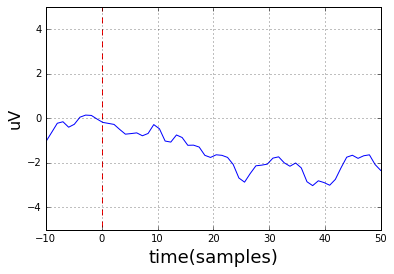

In [21]:
# WE HAVE ARRIVED! This is the finishline

ERPs = np.mean(clean_epoched_data, axis=1)

print 'This is the ERP as recorded from one electrode'
            
elec = 6

# this time linspace, will help us plot the x axis, 
# as starting 200 ms before the onset of the stimulus, which is at 0
time = np.linspace(-10,50,60)

plt.plot(time, ERPs[elec,:])
plt.xlim([-10, 50])
plt.ylim([-5, 5])
plt.xlabel('time(samples)', fontsize=18)
plt.ylabel('uV', fontsize=16)
plt.plot((0, 0), (-10, 10), 'r--')
plt.grid()
plt.show()  

This is the ERP as recorded from one electrode


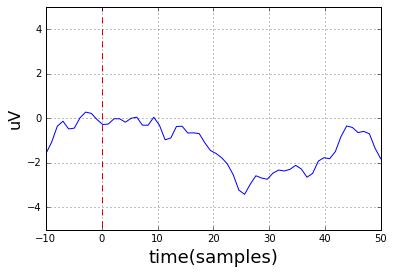

This is the ERP as recorded from one electrode


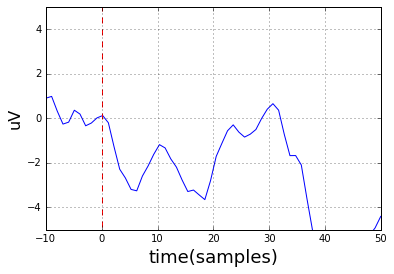

In [22]:
standard_ERPs = np.mean(clean_standard_epoched_data, axis=1)

print 'This is the ERP as recorded from one electrode'

plt.plot(time, standard_ERPs[elec,:])
plt.xlim([-10, 50])
plt.ylim([-5, 5])
plt.xlabel('time(samples)', fontsize=18)
plt.ylabel('uV', fontsize=16)
plt.plot((0, 0), (-10, 10), 'r--')
plt.grid()
plt.show()

###################

deviant_ERPs = np.mean(clean_deviant_epoched_data, axis=1)

print 'This is the ERP as recorded from one electrode'

plt.plot(time, deviant_ERPs[elec,:])
plt.xlim([-10, 50])
plt.ylim([-5, 5])
plt.xlabel('time(samples)', fontsize=18)
plt.ylabel('uV', fontsize=16)
plt.plot((0, 0), (-10, 10), 'r--')
plt.grid()
plt.show() 

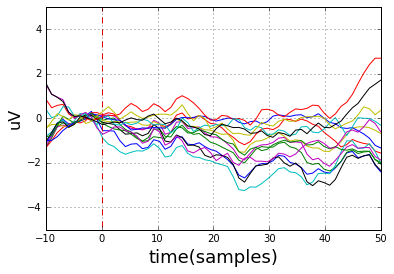

In [23]:
# let's look at all the electrodes at once!

plt.plot(time, ERPs.T)
plt.xlim([-10, 50])
plt.ylim([-5, 5])
plt.xlabel('time(samples)', fontsize=18)
plt.ylabel('uV', fontsize=16)
plt.plot((0, 0), (-10, 10), 'r--')
plt.grid()
plt.show()

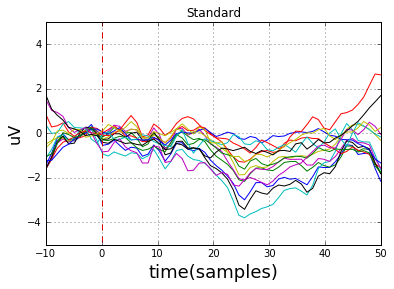

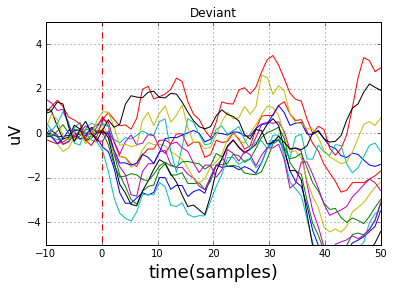

In [42]:
plt.plot(time, standard_ERPs.T)
plt.title('Standard')
plt.xlim([-10, 50])
plt.ylim([-5, 5])
plt.xlabel('time(samples)', fontsize=18)
plt.ylabel('uV', fontsize=16)
plt.plot((0, 0), (-10, 10), 'r--')
plt.grid()
plt.show()

plt.plot(time, deviant_ERPs.T)
plt.title('Deviant')
plt.xlim([-10, 50])
plt.ylim([-5, 5])
plt.xlabel('time(samples)', fontsize=18)
plt.ylabel('uV', fontsize=16)
plt.plot((0, 0), (-10, 10), 'r--')
plt.grid()
plt.show()

In [47]:
# channels = [7, 12, 2, 14, 8]
# # let's look at all the electrodes at once!
# some_ERPs = np.asarray([ERP for channel, ERP in enumerate(ERPs) if channel in channels])
# plt.plot(time, some_ERPs.T)
# plt.xlim([-10, 50])
# plt.ylim([-5, 5])
# plt.xlabel('time(samples)', fontsize=18)
# plt.ylabel('uV', fontsize=16)
# plt.plot((0, 0), (-10, 10), 'r--')
# plt.grid()
# plt.show()

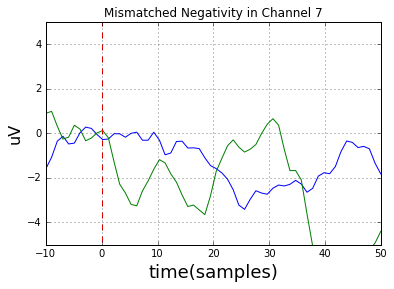

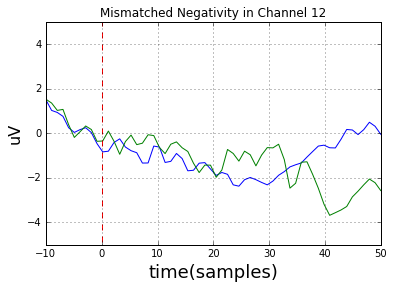

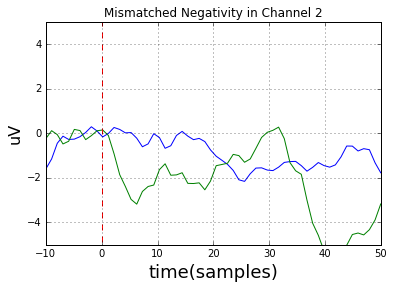

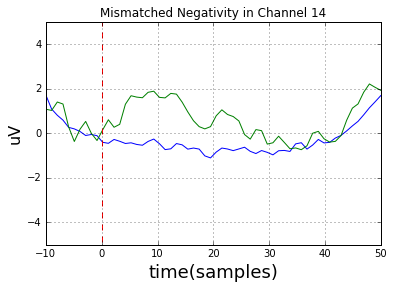

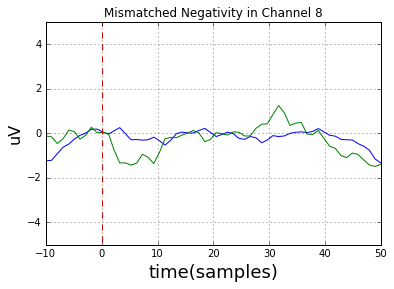

In [41]:
channels = [6, 11, 1, 13, 7]
# let's look at all the electrodes at once!
for channel in channels: 
    plt.title('Mismatched Negativity in Channel %s' %(channel + 1))
    plt.plot(time, standard_ERPs[channel].T)
    plt.plot(time, deviant_ERPs[channel].T)
    plt.xlim([-10, 50])
    plt.ylim([-5, 5])
    plt.xlabel('time(samples)', fontsize=18)
    plt.ylabel('uV', fontsize=16)
    plt.plot((0, 0), (-10, 10), 'r--')
    plt.grid()
    plt.show()

In [27]:
print stim_triggs[stim_idx]

[[ 6.  8.  2. ...,  6.  1.  5.]]
